In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd

In [94]:
df = pd.read_csv('ProcessedTexts.csv', index_col='ROWID')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855 entries, 153251 to 130705
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        855 non-null    int64  
 1   SenderPhonNumber  855 non-null    int64  
 2   Sender            855 non-null    object 
 3   text              855 non-null    object 
 4   attributedBody    855 non-null    object 
 5   type              855 non-null    int64  
 6   date              855 non-null    float64
 7   timestamp         855 non-null    object 
 8   month_name        855 non-null    object 
 9   day_name          855 non-null    object 
 10  day               855 non-null    int64  
 11  hour              855 non-null    int64  
 12  weekday           855 non-null    int64  
 13  week              855 non-null    int64  
 14  year              855 non-null    int64  
 15  polarity          855 non-null    float64
 16  subjectivity      855 non-null    fl

In [95]:
df['month_year'] = pd.to_datetime(df['month_name'] + ' ' + df['year'].astype(str))

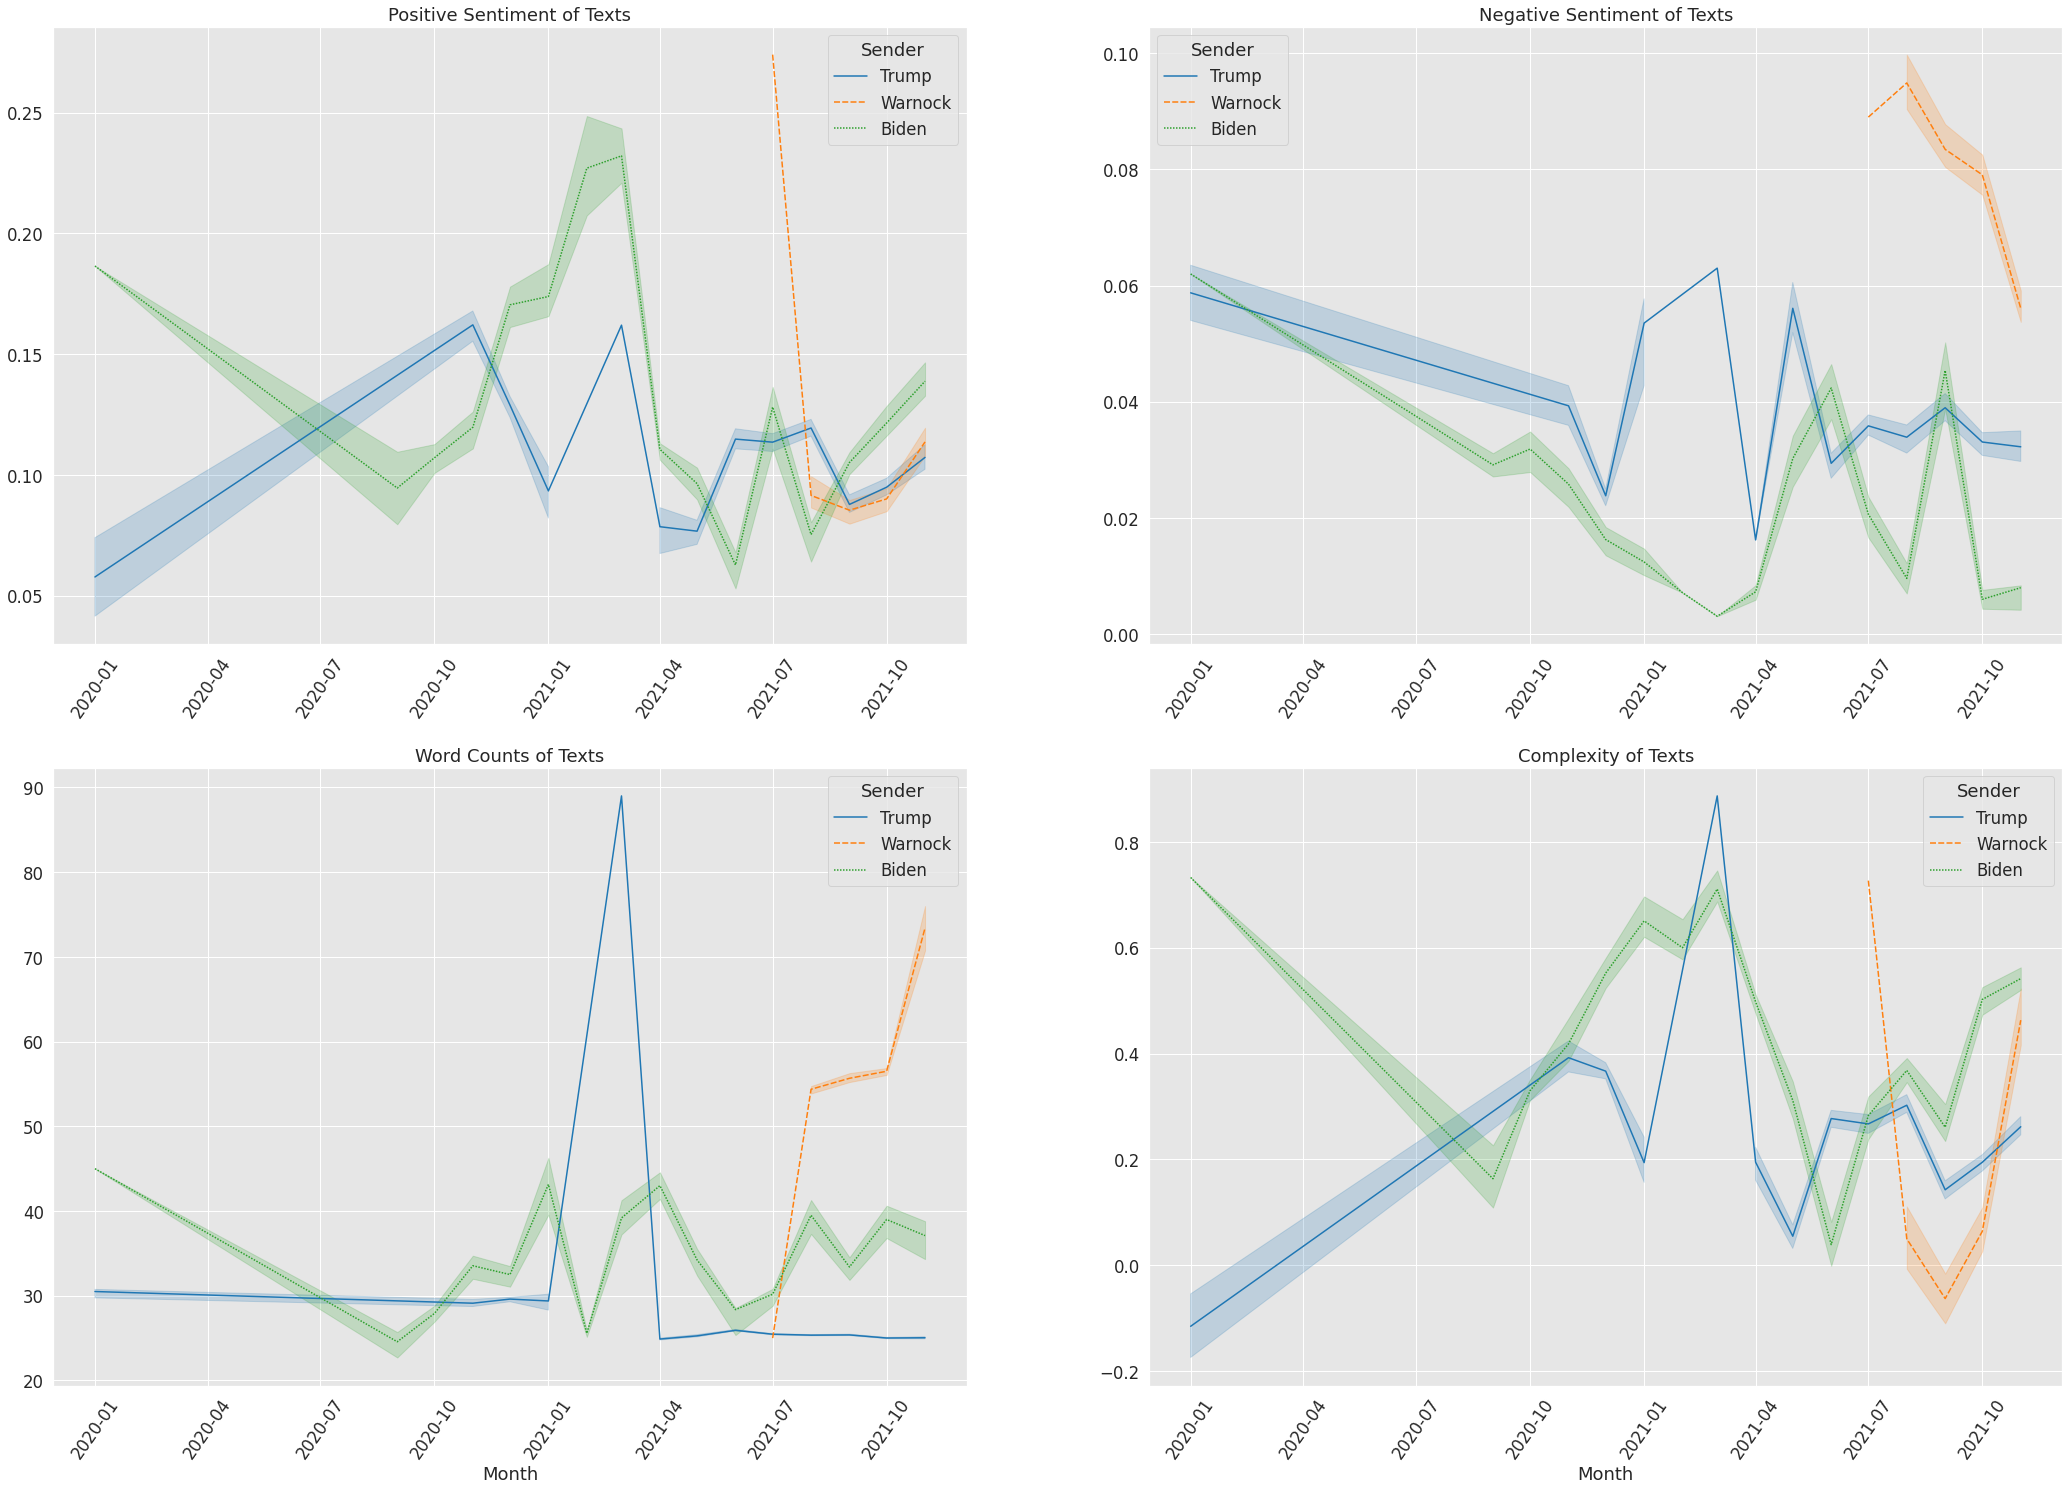

In [96]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
f, axs = plt.subplots(2,2, figsize=(36,25), gridspec_kw=dict(width_ratios=[4, 4]))
error_style = 'band'
confidence = 25
sns.lineplot(x='month_year', y='positivity', hue='Sender', style='Sender', err_style=error_style, ci=confidence, data=df, ax=axs[0,0]).set(title="Positive Sentiment of Texts", ylabel=None, xlabel=None)
for tick in axs[0,0].get_xticklabels():
    tick.set_rotation(55)
sns.lineplot(x='month_year', y='negativity', hue='Sender', style='Sender', err_style=error_style, ci=confidence, data=df, ax=axs[0,1]).set(title="Negative Sentiment of Texts", ylabel=None, xlabel=None)
for tick in axs[0,1].get_xticklabels():
    tick.set_rotation(55)
sns.lineplot(x='month_year', y='word_count', hue='Sender', style='Sender', err_style=error_style, ci=confidence, data=df, ax=axs[1,0]).set(title="Word Counts of Texts", ylabel=None, xlabel='Month')
for tick in axs[1,0].get_xticklabels():
    tick.set_rotation(55)
sns.lineplot(x='month_year', y='compound', hue='Sender', style='Sender', err_style=error_style, ci=confidence, data=df, ax=axs[1,1]).set(title="Complexity of Texts", ylabel=None, xlabel='Month')
for tick in axs[1,1].get_xticklabels():
    tick.set_rotation(55)

<AxesSubplot:xlabel='compound', ylabel='Density'>

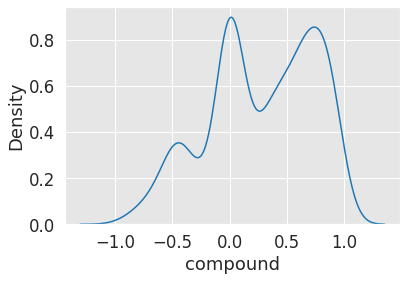

In [97]:
sns.kdeplot(df['compound'])

In [98]:
def generate_word_cloud(sender): 
    nouns = ""
    sdf = df[df['Sender'] == sender]
    for text in sdf['text']:
        for noun in TextBlob(text).noun_phrases: 
            nouns += f" {noun}"
    # Create the wordcloud object
    pass_list = ['corey', 'stop2end', 'stop2quit', 'recipient name', 'recipient  name', '< recipient name >', 'bit', 'ly', 'name', 'recipient']
    wordcloud = WordCloud(width=8000, height=4600, background_color="white", stopwords=pass_list, margin=2).generate(nouns)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

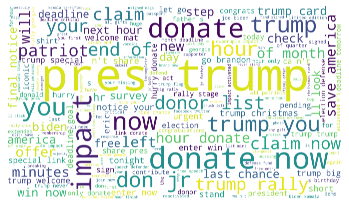

In [99]:
generate_word_cloud('Trump')

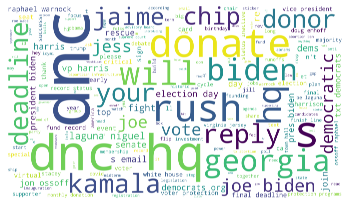

In [100]:
generate_word_cloud('Biden')

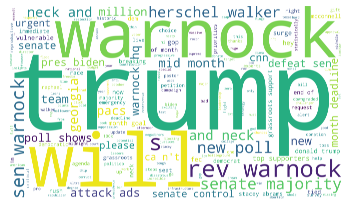

In [102]:
generate_word_cloud('Warnock')

<AxesSubplot:xlabel='word_count', ylabel='Density'>

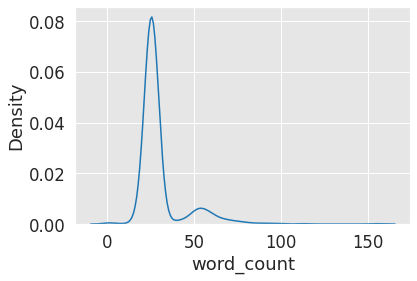

In [101]:
sns.kdeplot(df['word_count'])

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861 entries, 153251 to 130705
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        861 non-null    int64         
 1   SenderPhonNumber  861 non-null    int64         
 2   Sender            861 non-null    object        
 3   text              861 non-null    object        
 4   attributedBody    861 non-null    object        
 5   type              861 non-null    int64         
 6   date              861 non-null    float64       
 7   timestamp         861 non-null    object        
 8   month_name        861 non-null    object        
 9   day_name          861 non-null    object        
 10  day               861 non-null    int64         
 11  hour              861 non-null    int64         
 12  weekday           861 non-null    int64         
 13  week              861 non-null    int64         
 14  year              

[Text(0.5, 1.0, 'Complexity of Texts'), Text(0, 0.5, ''), Text(0.5, 0, '')]

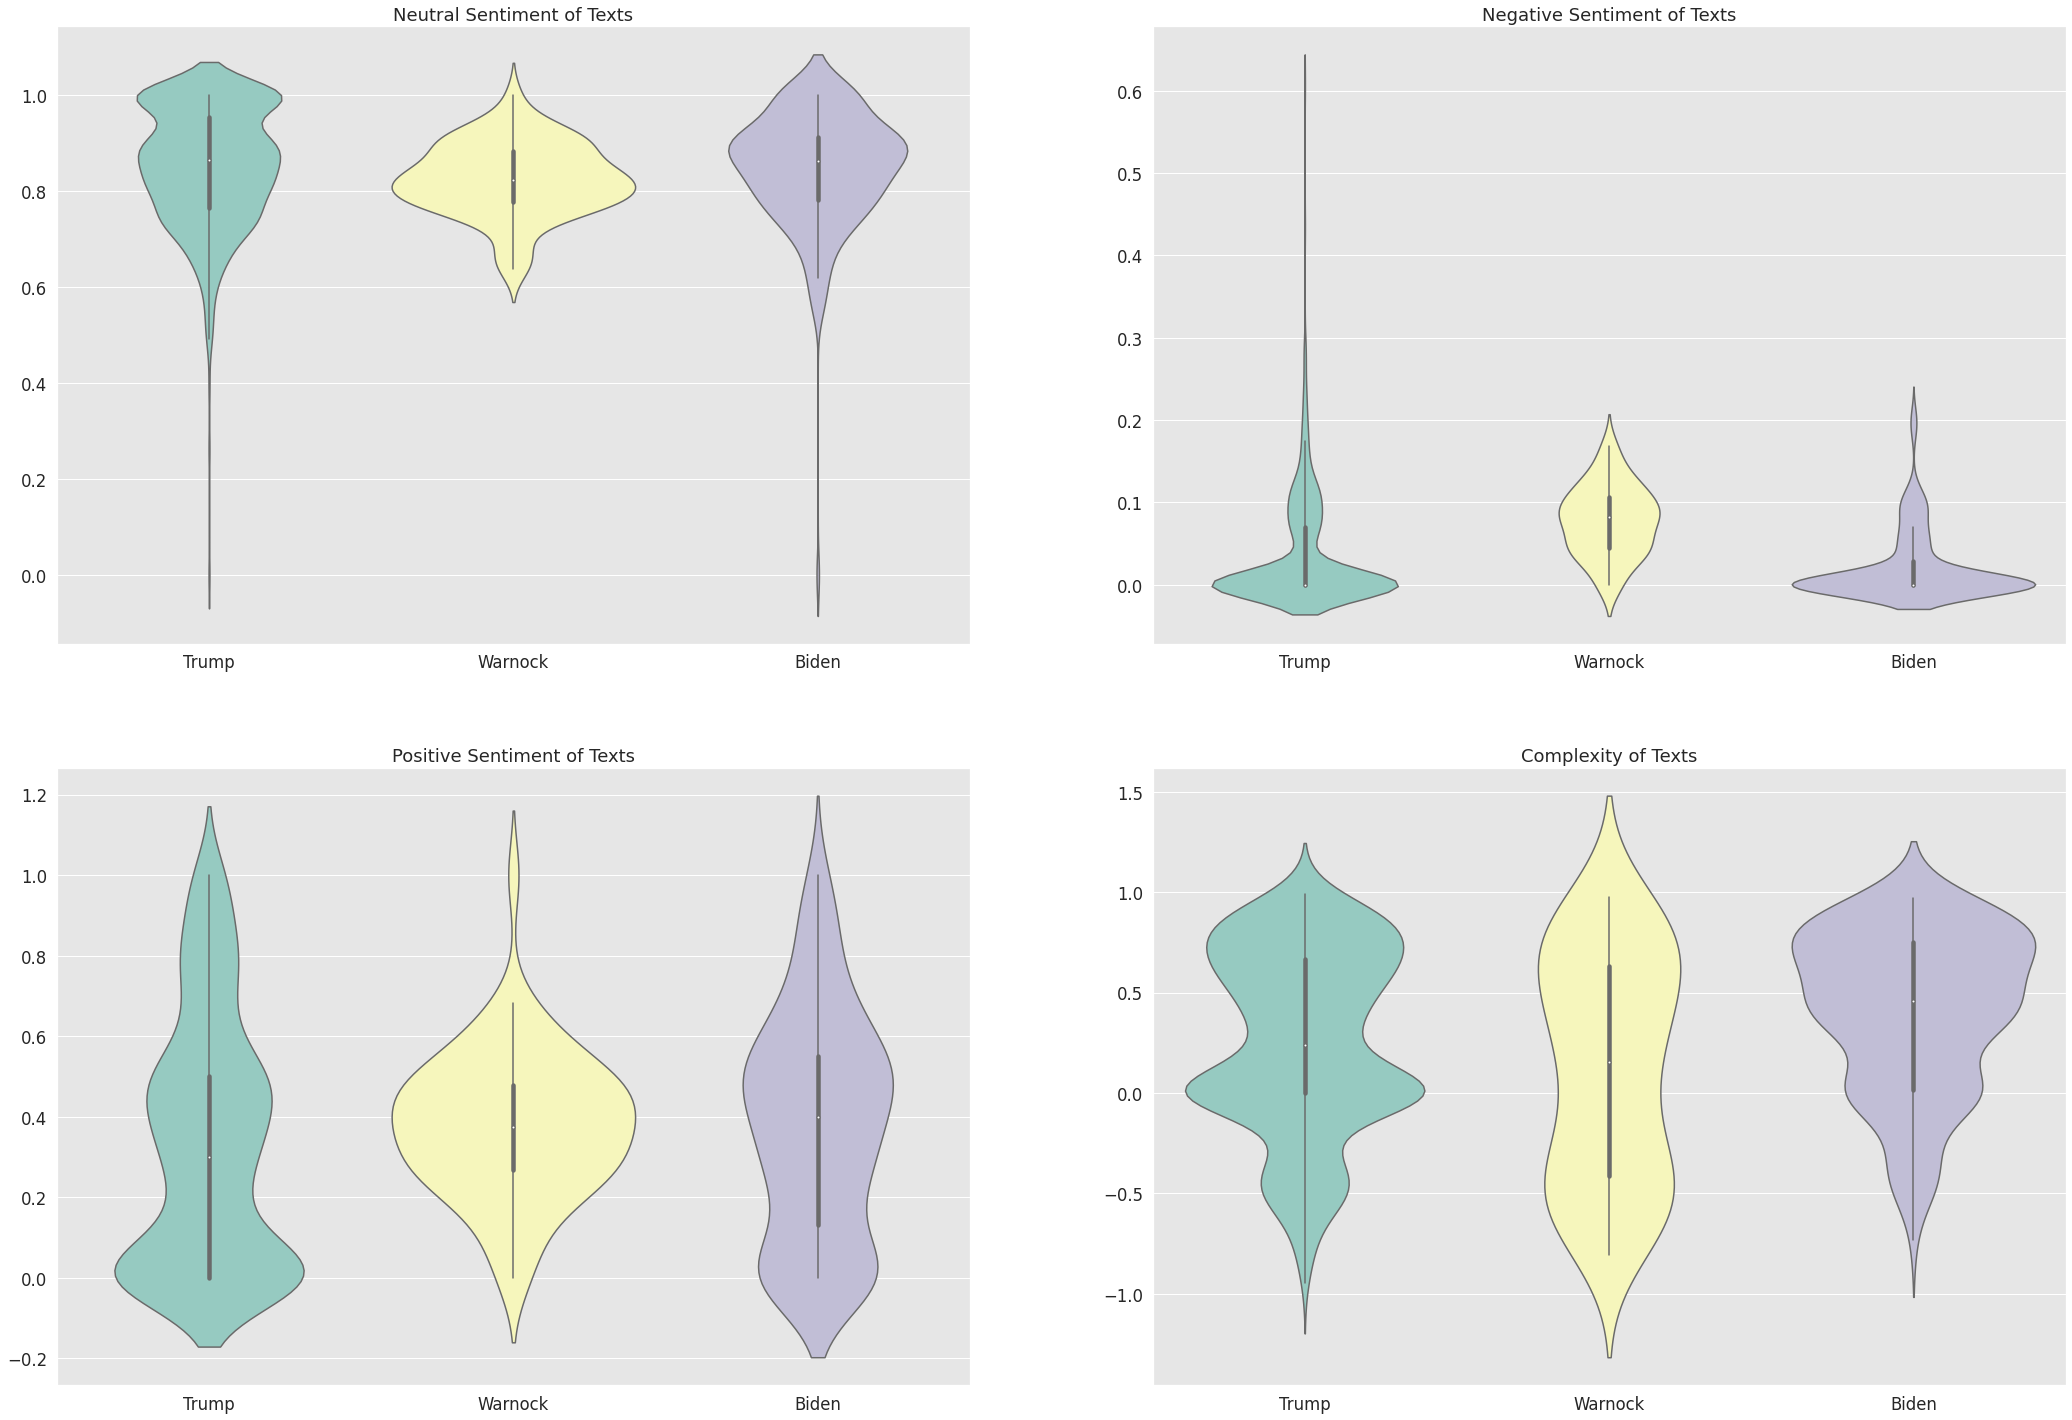

In [90]:
f, axs = plt.subplots(2,2, figsize=(36,25), gridspec_kw=dict(width_ratios=[4, 4]))
colors = 'Set3'
sns.violinplot(x='Sender', y='neutrality', data=df, palette=colors, ax=axs[0,0]).set(title="Neutral Sentiment of Texts", ylabel=None, xlabel=None)
sns.violinplot(x='Sender', y='subjectivity', data=df, palette=colors, ax=axs[1,0]).set(title="Positive Sentiment of Texts", ylabel=None, xlabel=None)
sns.violinplot(x='Sender', y='negativity', data=df, palette=colors, ax=axs[0,1]).set(title="Negative Sentiment of Texts", ylabel=None, xlabel=None)
sns.violinplot(x='Sender', y='compound', data=df, palette=colors, ax=axs[1,1]).set(title="Complexity of Texts", ylabel=None, xlabel=None)

(array([ 0., 10., 20., 30., 40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

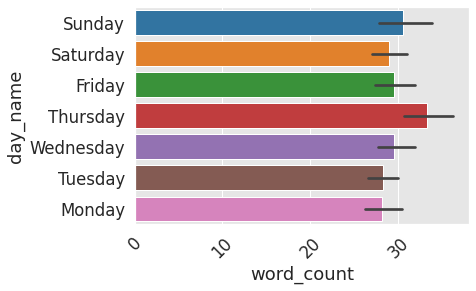

In [70]:
sns.barplot(y='day_name', x='word_count', data=df)
plt.xticks(rotation=45)

In [91]:
df[df['word_count'] == df['word_count'].max()]['text'].iloc[0]


"￼<recipient name>, I'm the most vulnerable Senate Democrat up for reelection next year & I need your help: While my potential opponent Herschel Walker (R) is aligning himself with Trump & McConnell, I've spent my time in the Senate fighting for our progressive priorities. I'm in office to stand up to corrupt leaders & restore moral leadership to our government.\n\nPOLITICO says that Democrats' chances of defending our razor-thin majority hinge on keeping GA blue. Right now, we're running neck & neck with Walker - but while he's relying on GOP megadonors to try to buy this seat, I'm running a people-powered campaign. And unfortunately, with time running out before our mid-month deadline, we're falling short of our goal.\n\nThat's why I'm personally asking for your help today: Will you give $15 or more now so we can hit our mid-month goal, win in GA & defend our Senate majority? bit.ly/3qolzy5 - Rev. Warnock\n\nStop2End"

In [92]:
df.sort_values('positivity', ascending=False)[['Sender', 'text', 'positivity']].head(10)

,Sender,text,positivity
ROWID,,,
144200,Trump,HELP,1.000
132221,Biden,YES,1.000
142979,Trump,All true,0.737
134996,Trump,￼President Trump: On behalf of our wonderful F...,0.506
134744,Trump,The President has a special CHRISTMAS GIFT for...,0.471
150496,Trump,WOW!\n\nPresident Trump AND Herschel Walker si...,0.456
149718,Trump,WOW!\n\nPresident Trump AND Herschel Walker si...,0.456
134126,Trump,"Pres. Trump: On behalf of the Trump Family, I ...",0.454
136444,Biden,"Jaime here! You donated generously last month,...",0.429


In [93]:
df.sort_values('negativity', ascending=False)[['Sender', 'text', 'negativity']].head(10)

,Sender,text,negativity
ROWID,,,
144198,Trump,Sad trump noises,0.608
147798,Trump,Pres Trump: Biden just went on TV & blamed ME ...,0.435
142972,Trump,MADMAN\nLUNATIC\nRACIST\nCORRUPT\n\n^ that's w...,0.296
135250,Trump,Pres Trump: Is it true that voting machines 's...,0.292
134015,Trump,Pres Trump & VP Pence: It's so urgent we BOTH ...,0.276
148821,Trump,Pres Trump: I've said it once and I'll say it ...,0.275
152670,Trump,'20 FRAUD?\n'21 DO NOTHING TO FIX\n'22 WE LOSE...,0.273
149548,Trump,"""This is not about freedom""\n\nThat's what Bid...",0.259
145027,Trump,Don Jr: Our FEC Deadline is TOMORROW. If we do...,0.240


In [103]:
df.groupby('Sender').count()

,Unnamed: 0,SenderPhonNumber,text,attributedBody,type,date,timestamp,month_name,day_name,day,...,polarity,subjectivity,negativity,neutrality,positivity,compound,nouns,tags,word_count,month_year
Sender,,,,,,,,,,,,,,,,,,,,,
Biden,181,181,181,181,181,181,181,181,181,181,...,181,181,181,181,181,181,181,181,181,181
Trump,619,619,619,619,619,619,619,619,619,619,...,619,619,619,619,619,619,619,619,619,619
Warnock,55,55,55,55,55,55,55,55,55,55,...,55,55,55,55,55,55,55,55,55,55
